In [22]:
import numpy as np
import matplotlib.pyplot as plt

# делаем посев случайных чисел предсказуемым
np.random.seed(12345)

In [23]:
# функция сигмоида
def sigmoid(z):
    a = 1/(1 + np.exp(-z))
    return a

In [24]:
# количество элементов вектора x
ncol = 3
# обучающая выборка будет состоять из nrow элементов
nrow = 5
# количество нейронов в скрытом слое сети
n_hidden_layer = 4
# количество нейронов в выходном слое сети
n_output = 1

In [25]:
# обучающая матрица, состоящая из nrow строк и ncol столбцов, элементы матрицы - случайные числа
x_train = (np.random.random((nrow, ncol)))

# результат
y_train = np.array([1, 0, 1, 1, 1])

# веса скрытоко слоя сети
w1 = np.random.random((n_hidden_layer, ncol))

# отклонения скрытого слоя сети
#b1 = np.random.random((n_hidden_layer, 1))
b1 = np.zeros((n_hidden_layer, n_output))

# веса выходного слоя сети
w2 = np.random.random((n_output, n_hidden_layer))

# отклонения выходного слоя сети
b2 = np.zeros((n_output, n_output))

print("Обучающая выборка x_train:")
print(x_train)
print("\nДопустимые ответы y_train:")
print(y_train)
print("\nМатрица весов скрытого слоя w1:")
print(w1)
print("\nОтклонения скрытого слоя b1:")
print(b1)
print("\nМатрица весов выходного слоя w2:")
print(w2)
print("\nОтклонения выходного слоя b2:")
print(b2)

Обучающая выборка x_train:
[[ 0.92961609  0.31637555  0.18391881]
 [ 0.20456028  0.56772503  0.5955447 ]
 [ 0.96451452  0.6531771   0.74890664]
 [ 0.65356987  0.74771481  0.96130674]
 [ 0.0083883   0.10644438  0.29870371]]

Допустимые ответы y_train:
[1 0 1 1 1]

Матрица весов скрытого слоя w1:
[[ 0.65641118  0.80981255  0.87217591]
 [ 0.9646476   0.72368535  0.64247533]
 [ 0.71745362  0.46759901  0.32558468]
 [ 0.43964461  0.72968908  0.99401459]]

Отклонения скрытого слоя b1:
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Матрица весов выходного слоя w2:
[[ 0.67687371  0.79082252  0.17091426  0.02684928]]

Отклонения выходного слоя b2:
[[ 0.]]


In [26]:
# коэффициент обучения
learning_rate = 0.5
# количество итераций обучения
num_iterations = 10000

costs=[]

for i in range(0, num_iterations):

    # Прямое распространение
    z1 = np.dot(w1, x_train.T) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    y_hat = a2 = sigmoid(z2)
    
    # функция затрат
    cost = (1./nrow) * (-np.dot(y_train, np.log(y_hat).T) - np.dot(1 - y_train, np.log(1 - y_hat).T))
    
    # обратное распространение
    
    # произодная функции стоимости
    cost_derivative = - (np.divide(y_train, y_hat) - np.divide(1 - y_train, 1 - y_hat))
    
    dz2 = cost_derivative * y_hat * (1 - y_hat)
    dw2 = (1./nrow) * np.dot(dz2, a1.T)
    db2 = (1./nrow) * np.sum(dz2, axis=1, keepdims=True)
    da1 = np.dot(w2.T,dz2)
    
    dz1 = da1 * a1 * (1 - a1)
    dw1 = (1./nrow) * np.dot(dz1, x_train)
    db1 = (1./nrow) * np.sum(dz1, axis=1, keepdims=True)
    da0 = np.dot(w1.T,z1)
    
    # обновляем значения весов
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    
    # печать значения функции затрат каждые 100 итераций
    if i % 100 == 0:
        print("Значение функции затрат после итерации {}: {}".format(i, np.squeeze(cost)))
    if i % 100 == 0:
        costs.append(cost)


Значение функции затрат после итерации 0: 0.4972750510991481
Значение функции затрат после итерации 100: 0.4753932379700027
Значение функции затрат после итерации 200: 0.42434727506483194
Значение функции затрат после итерации 300: 0.35511162841969396
Значение функции затрат после итерации 400: 0.2904256249870396
Значение функции затрат после итерации 500: 0.22686272058189738
Значение функции затрат после итерации 600: 0.16834151899030375
Значение функции затрат после итерации 700: 0.12225573727451544
Значение функции затрат после итерации 800: 0.08959661235438401
Значение функции затрат после итерации 900: 0.06739873074373924
Значение функции затрат после итерации 1000: 0.05229531165149257
Значение функции затрат после итерации 1100: 0.04179233658142917
Значение функции затрат после итерации 1200: 0.03427457894650863
Значение функции затрат после итерации 1300: 0.028733323713651615
Значение функции затрат после итерации 1400: 0.02453637821497332
Значение функции затрат после итерации 

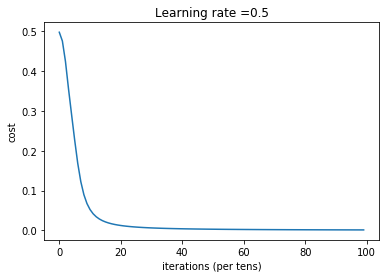

In [27]:
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()